## 1. Problem Statement
- Identify which questions asked on Quora are duplicates of questions that have already been asked.
- This could be useful to instantly provide answers to questions that have already been answered.
- We are tasked with predicting whether a pair of questions are duplicates or not.

## 2. Machine Learning Probelm
- It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not.
- Performance Metric : 
        log-loss
        Binary Confusion Matrix
- We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('quora_duplicate_questions.tsv', sep='\t',nrows=50000)
df.shape

(50000, 6)

In [3]:
df.head(6)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50000 non-null  int64 
 1   qid1          50000 non-null  int64 
 2   qid2          50000 non-null  int64 
 3   question1     50000 non-null  object
 4   question2     50000 non-null  object
 5   is_duplicate  50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.3+ MB


In [5]:
# extract single row
df.iloc[5]['question1']

'Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?'

### Distribution of data points among output classes

<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

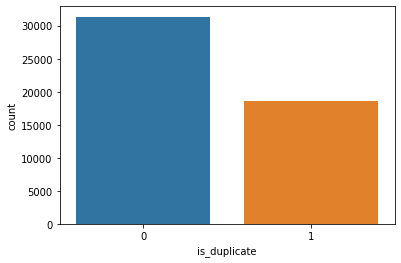

In [6]:
sns.countplot(df.is_duplicate)

This plot show the class distribution of dataset. From above plot it can be concluded that this dataset is imbalanced because the number of datapoints for class-1 (Similar) is less than class-0 (Not similar)

In [7]:
df.is_duplicate.value_counts(1)*100

0    62.702
1    37.298
Name: is_duplicate, dtype: float64

###  Unique v/s Repeated Question

In [8]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.
       format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 88911

Number of unique questions that appear more than one time: 7396 (8.318430790340903%)

Max number of times a single question is repeated: 15



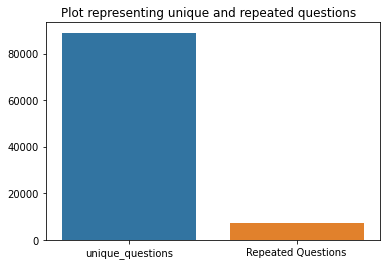

In [9]:
xx = ["unique_questions" , "Repeated Questions"]
yy =  [unique_qs , qs_morethan_onetime]

plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(xx,yy)
plt.show()

### Checking for Duplicates Rows

In [10]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


### Number of occurrences of each question

Maximum number of times a single question is repeated: 15



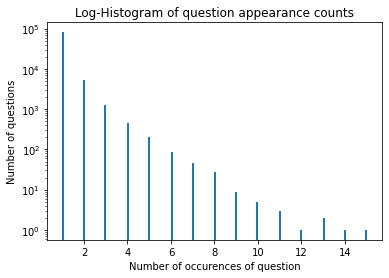

In [11]:

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts())))

## Data Preprocess

In [12]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [13]:
df.shape

(50000, 6)

- As id,qid1,qid2 is not so important so i drop this columns

In [14]:
preprocess_data = df.copy()

In [15]:
preprocess_data.drop(['id','qid1','qid2'],axis=1,inplace=True)

In [16]:
preprocess_data.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### Now make question1 and question2 one column as combaine

In [17]:
preprocess_data['combaine'] = preprocess_data['question1'] + " " + preprocess_data['question2']

In [18]:
preprocess_data.drop(['question1','question2'],axis=1,inplace=True)

In [19]:
preprocess_data.head()

,is_duplicate,combaine
0,0,What is the step by step guide to invest in sh...
1,0,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,0,How can I increase the speed of my internet co...
3,0,Why am I mentally very lonely? How can I solve...
4,0,"Which one dissolve in water quikly sugar, salt..."


In [20]:
preprocess_data.dropna(inplace=True)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,3))
X = vectorizer.fit_transform(preprocess_data['combaine'])

In [22]:
X.shape

(50000, 895096)

In [23]:
y = preprocess_data['is_duplicate']

In [24]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_sample(X, y)
print(x_resample.shape)
print(y_resample.shape)

(62702, 895096)
(62702,)


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_resample, y_resample ,test_size=0.25,random_state=5)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((47026, 895096), (15676, 895096), (47026,), (15676,))

## Model Build

In [27]:
from sklearn.metrics import log_loss,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [28]:
def plot_confusion_matrix(t_y, p_y):
    C = confusion_matrix(t_y, p_y)
    A = (((C.T) / (C.sum(axis=1))).T)
    B = (C/C.sum(axis=0))
    
    
    plt.figure(figsize=(20,4))
    labels = [1,2]
    
    
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()

### 1. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',C=1)
clf.fit(X_train, y_train)

LogisticRegression(C=1)

In [30]:
y_pred = clf.predict(X_test)
print("Log loss - ",log_loss(y_test,y_pred))
print("Accuracy is - ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Log loss -  7.068225345631502
Accuracy is -  0.79535595815259
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      7860
           1       0.81      0.77      0.79      7816

    accuracy                           0.80     15676
   macro avg       0.80      0.80      0.80     15676
weighted avg       0.80      0.80      0.80     15676



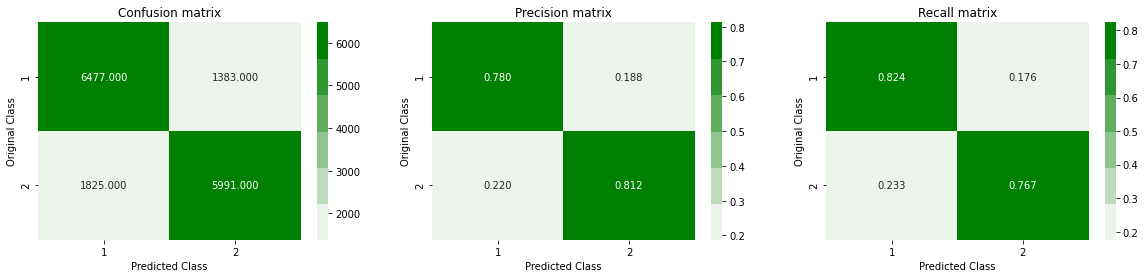

In [31]:
plot_confusion_matrix(y_test,y_pred)

### 2. Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.5,fit_prior=False)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.5, fit_prior=False)

Log loss -  7.636739545312226
Accuracy is -  0.7788976779790763
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      7860
           1       0.72      0.90      0.80      7816

    accuracy                           0.78     15676
   macro avg       0.80      0.78      0.78     15676
weighted avg       0.80      0.78      0.78     15676



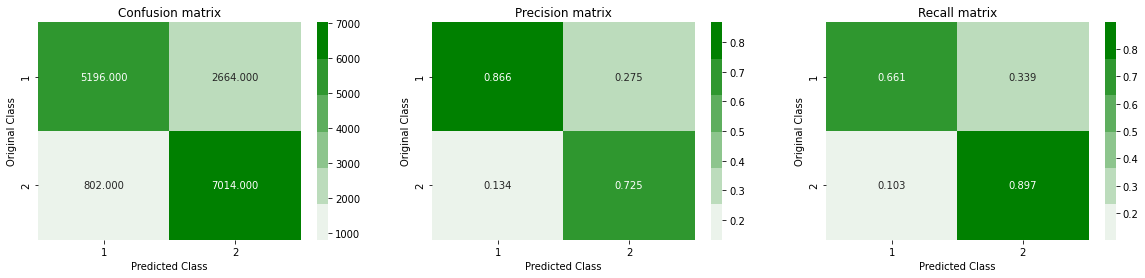

In [33]:
y_pred = classifier.predict(X_test)
print("Log loss - ",log_loss(y_test,y_pred))
print("Accuracy is - ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

plot_confusion_matrix(y_test,y_pred)

In [41]:
#dump tfidf
import pickle
# pickle.dump(vectorizer, open('tfidf-transform.pkl', 'wb'))
# #model
# pickle.dump(vectorizer, open('tfidf-transform.pkl', 'wb'))

### User Prediction

In [43]:
q1 = " What is java ? "
q2 = " Meaning of Java ? "

combaine = q1 + " " + q2
tfidf = vectorizer.transform([combaine])
pred = classifier.predict(tfidf)
pred[0]

if pred[0] == 1:
    print('Question Are Same')
elif pred[0] == 0:
    print('Question Different')

Question Are Same


In [ ]:
df.iloc[5]['question2']